# Homework 5

## PreProcess

**The importation library**

In [1]:
import pandas as pd
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from queue import Queue

**Reading documents**

Set the graph with networkx

In [2]:
graph = nx.DiGraph()
# for each link in links add edge
# the weight of edges is 1 (for all)
for line in open('wikigraph_reduced.csv', 'r').readlines()[1:]:
    nodes = line.replace('\n', '').split('\t')
    graph.add_edge(int(nodes[1]), int(nodes[2]), weight=1)

Set the category dictionary

In [3]:
categories = dict()
#for each category set the name as key and a list of nodes as article
for line in open('wiki-topcats-categories.txt', 'r').readlines():
    s = line.index(':')
    e = line.index(';')
    cat_name = line[s+1 : e].replace('_', ' ')
    cat_list = line[e+1:].split()
    categories[cat_name] = [int(c) for c in cat_list]

Compute the reverse index for categories: for each article a list of categories

In [4]:
art_cat = defaultdict(list)
for name, values in categories.items():
    for value in values:
        art_cat[value].append(name)

Set a list of pages names: for each index of a list the corrispondent page name (article name)

In [5]:
page_names = list()
for line in open('wiki-topcats-page-names.txt', 'r').readlines():
    i = line.index(' ')
    page_names.append(line[i+1:].replace('\n', ''))

compute the inverted_page_names: a dict with names as keys and index as values

In [6]:
inverted_page_names = dict()
for index, name in enumerate(page_names):
    inverted_page_names[name] = index

## RQ1

G is in the variable _graph_.

It is a directed network with all edges with weight equal to 1.

In [7]:
# Number of articles
print("The number of articles (nodes) are", len(graph.nodes))

The number of articles (nodes) are 98343


In [8]:
# number of edges/hyperlinks 
print("The number of hyperlinks (edges) are", len(graph.edges))

The number of hyperlinks (edges) are 483094


In [28]:
# count incoming links
incoming_links = dict(graph.degree)

# average number of degree: incoming links
print("The average number of incoming links in an arbitrary page is",\
      round(np.mean(list(incoming_links.values())), 2))
print("The minimum number of incoming links is", min(incoming_links.values()),\
     "and the maximum is", max(incoming_links.values()))

The average number of incoming links in an arbitrary page is 9.82
The minimum number of incoming links is 1 and the maximum is 10832


In [10]:
# count the outgoing links
outgoing_links = dict(graph.out_degree)

# print average
print("The average number of outgoing links in an arbitrary page is",\
      round(np.mean(list(outgoing_links.values())), 2))
print("The minimum number of outgoing links is", min(outgoing_links.values()),\
     "and the maximum is", max(outgoing_links.values()))

The average number of outgoing links in an arbitrary page is 4.91
The minimum number of outgoing links is 0 and the maximum is 1367


In [11]:
# density of graph
print("The density of graph is", round(len(graph.edges)/(len(graph.nodes)*(len(graph.nodes)-1)), 5))

The density of graph is 5e-05


To evaluate the density result we can match the our result with the result of built-in function of networkx

In [12]:
print("Its value is", round(nx.density(graph), 5))

Its value is 5e-05


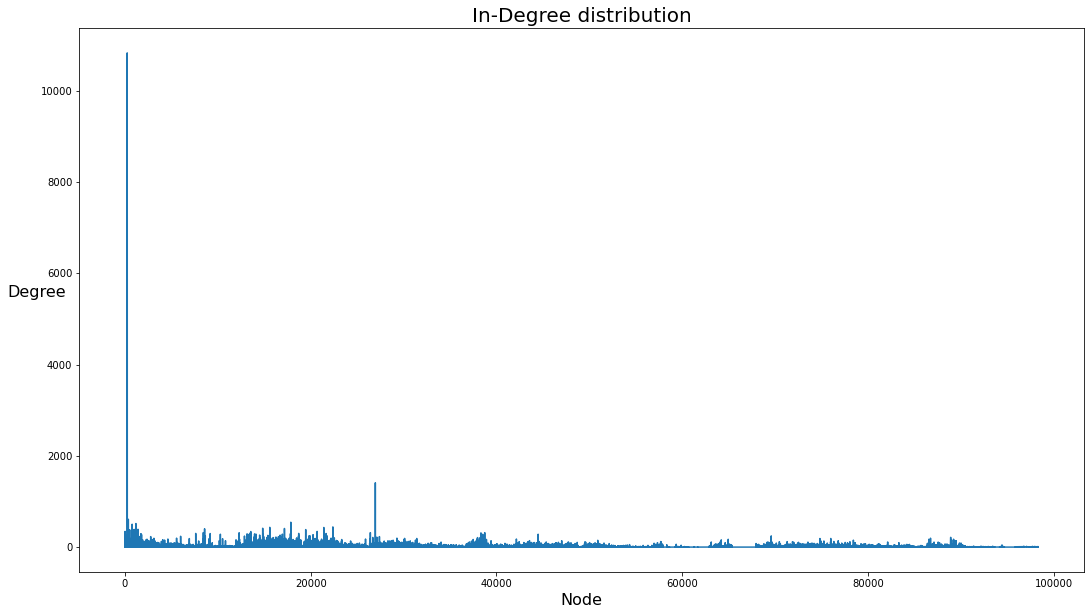

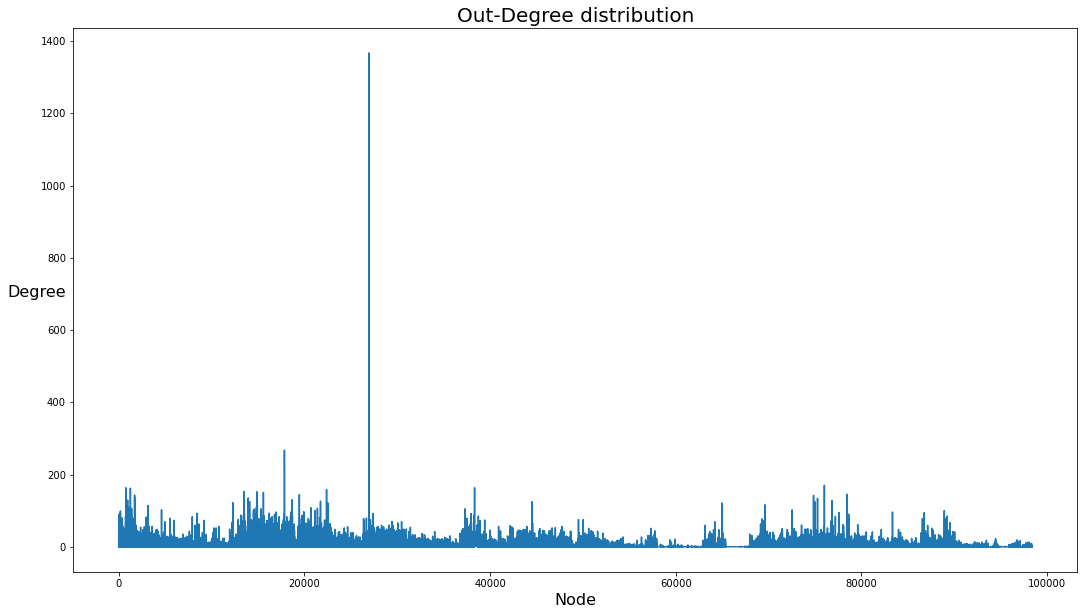

In [30]:
# degree distrubution
plt.figure(figsize=(18,10))
plt.title("In-Degree distribution", fontsize=20)
plt.xlabel('Node', fontsize=16)
plt.ylabel('Degree', fontsize=16, rotation=360)
plt.plot(list(incoming_links.values()))

plt.figure(figsize=(18,10))
plt.title("Out-Degree distribution", fontsize=20)
plt.xlabel('Node', fontsize=16)
plt.ylabel('Degree', fontsize=16, rotation=360)
plt.plot(list(outgoing_links.values()))

## RQ2

The function __exploring__ take in input a page _v_ and a number of clcks _d_ and return a set of pages that user can reach in _d_ clicks from _v_

In [14]:
# function to explore graph
def exploring(v, d):
    p = inverted_page_names[v]
    indices = support_exploring(p, d, set())
    return { page_names[i] for i in indices }

# support function for returning values
def support_exploring(v, d, r):
    # v: page
    # d: number of clicks
    # g: input graph
    # r: return value
    if d == 0:
        return r
    for n in graph.neighbors(v):
        return support_exploring(n, d-1, r|{v})

In the next cell there is a sample of function execution, with inputs:
- page: "Marty O'Brien"
- number of clicks: 3

In [15]:
exploring('This Way (Hana Pestle album)', 3)

{'22nd Century Lifestyle', "Marty O'Brien", 'This Way (Hana Pestle album)'}

## RQ3

Support function for solving RQ3

In [16]:
# Find the cenatral page in a category
def central_article(c):
    # c: category
    v = None
    d = 0
    degree = dict(graph.degree)
    for node in categories[c]:
        try:
            if degree[node] >= d:
                v = node
                d = degree[node]
        except:
            pass
    return v

Function to calculate distance between two nodes (pages) in network

In [17]:
# Breadth First Search
def BFS(n, g):
    # n: starting node to improve search
    # g: node goal
    frontier = Queue()
    visited = set()
    front_set = set()
    front_set.add(n)
    frontier.put(n)
    cost = 0
    while True:
        if frontier.empty():
            return "Not possible"
        node = frontier.get()
        front_set.remove(node)
        visited.add(node)
        if node == g:
            return cost
        cost += 1
        for son in graph.neighbors(node):
            if son not in visited and son not in front_set:
                frontier.put(son)
                front_set.add(son)

Function __explore_category__ returns the minimum number of clicks required to reach all pages in _p_, starting from the page _v_, corresponding to the most central article, according to the in-degree centrality, in category _c_

In [18]:
def explore_category(c, p):
    # c: category
    # p: set of pages in c
    v = central_article(c)
    pages = { inverted_page_names[name] for name in p }
    m = 0
    for page in pages:
        n = BFS(v, page) # minimum number of clicks
        if type(n) is int:
            m = max(m, n)
        else:
            return n
    return m

Test function with an input

In [19]:
c = 'Main Belt asteroids'

p = { page_names[i] for i in categories[c] }

explore_category(c, p)

'Not possible'

# implement an heuristic for this engine
# find a categroy tocheck result

In [20]:
min(dict(graph.out_degree).values())

0